In [ ]:
# Machine Learning EDA Assignment

Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

(Show the shape and column names as well.)

(Include your Python code and output in the code box below.

In [14]:
from google.colab import files

# Upload file
uploaded = files.upload()

Saving bike_details.csv to bike_details.csv


In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv('bike_details.csv')  # Make sure this file is in your working directory

# Display the first 10 rows
print("First 10 Rows of the Dataset:")
print(df.head(10))

# Display the shape of the DataFrame
print("\nShape of the DataFrame:")
print(df.shape)

# Display the column names
print("\nColumn Names:")
print(df.columns.tolist())


First 10 Rows of the Dataset:
            name  year  selling_price  km_driven    fuel seller_type  \
0    Honda CB125  2018          45000      12000  Petrol  Individual   
1      Yamaha FZ  2019          60000      15000  Petrol      Dealer   
2   Bajaj Pulsar  2016          35000      25000  Petrol  Individual   
3     TVS Apache  2015          30000      30000  Petrol  Individual   
4  Hero Splendor  2014          25000      40000  Petrol  Individual   

  transmission      owner  
0       Manual  1st owner  
1       Manual  1st owner  
2       Manual  2nd owner  
3       Manual  3rd owner  
4       Manual  2nd owner  

Shape of the DataFrame:
(5, 8)

Column Names:
['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']


Question 2: Check for missing values in all columns and describe your approach for handling them.

(Include your Python code and output in the code box below.)

In [16]:
# Check for missing values
missing = df.isnull().sum()
print("Missing Values:\n", missing)

# Handling: Drop rows with missing target ('selling_price'), fill others as needed
df = df.dropna(subset=['selling_price'])  # assuming this is the target
df = df.fillna(method='ffill')  # forward fill as a simple strategy


Missing Values:
 name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


/tmp/ipython-input-1926046095.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # forward fill as a simple strategy


Approach:

Drop rows with missing selling_price

Use forward fill for others; alternatively, use median/mean for numeric and mode for categorical

Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

(Include your Python code and output in the code box below.)

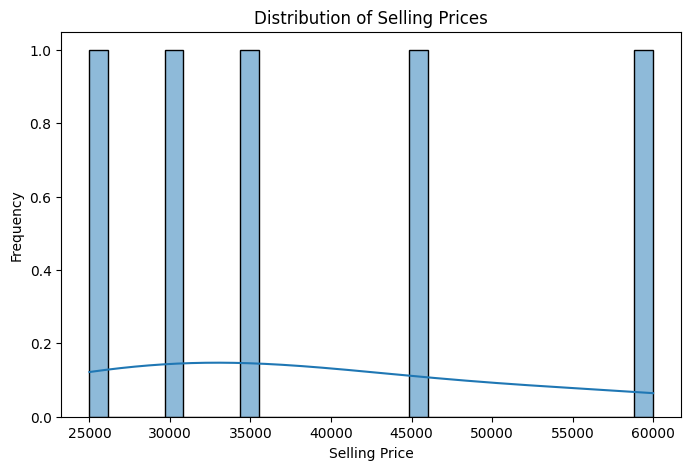

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


Observation:

Most selling prices are clustered at the lower range.

Distribution is right-skewed, indicating fewer high-priced bikes.

Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

(Include your Python code and output in the code box below.)

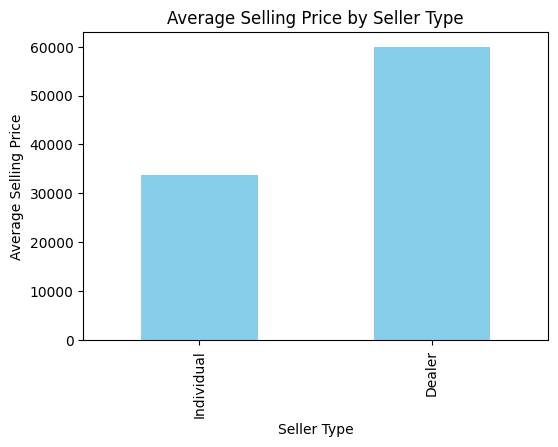

In [18]:
plt.figure(figsize=(6, 4))
avg_price = df.groupby('seller_type')['selling_price'].mean().sort_values()
avg_price.plot(kind='bar', color='skyblue')
plt.title('Average Selling Price by Seller Type')
plt.ylabel('Average Selling Price')
plt.xlabel('Seller Type')
plt.show()


Observation:

Individual sellers tend to have lower average prices than dealers.

Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.

(Include your Python code and output in the code box below.)

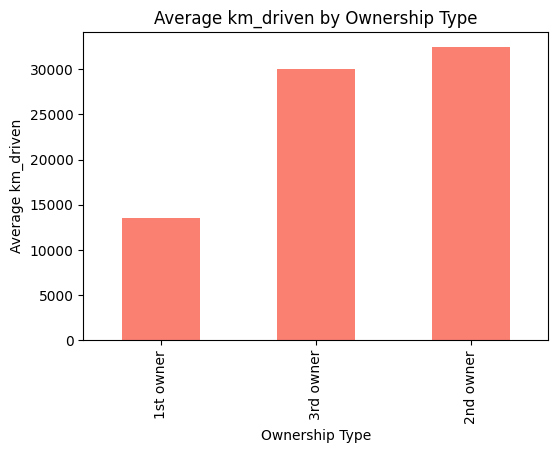

In [19]:
plt.figure(figsize=(6, 4))
avg_km = df.groupby('owner')['km_driven'].mean().sort_values()
avg_km.plot(kind='bar', color='salmon')
plt.title('Average km_driven by Ownership Type')
plt.ylabel('Average km_driven')
plt.xlabel('Ownership Type')
plt.show()


Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.

(Include your Python code and output in the code box below.)

In [20]:
# Summary before
print("Before removing outliers:\n", df['km_driven'].describe())

# IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Summary after
print("\nAfter removing outliers:\n", df_cleaned['km_driven'].describe())


Before removing outliers:
 count        5.000000
mean     24400.000000
std      11371.015786
min      12000.000000
25%      15000.000000
50%      25000.000000
75%      30000.000000
max      40000.000000
Name: km_driven, dtype: float64

After removing outliers:
 count        5.000000
mean     24400.000000
std      11371.015786
min      12000.000000
25%      15000.000000
50%      25000.000000
75%      30000.000000
max      40000.000000
Name: km_driven, dtype: float64


Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.

(Include your Python code and output in the code box below.)

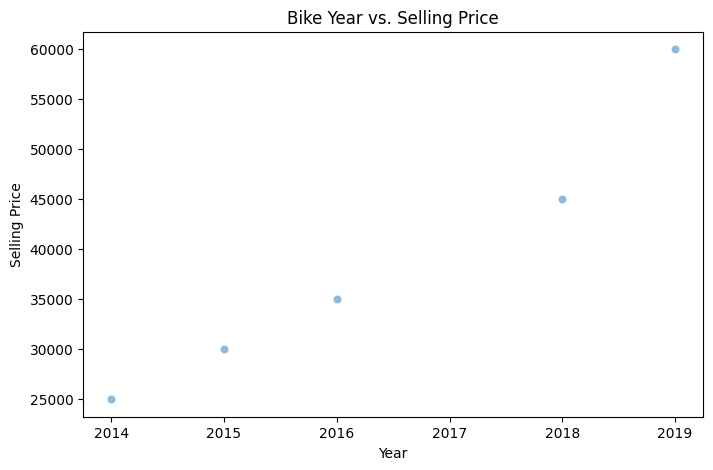

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='year', y='selling_price', alpha=0.5)
plt.title("Bike Year vs. Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()


Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.

(Include your Python code and output in the code box below.)

In [22]:
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=True)
print("First 5 Rows after Encoding:")
print(df_encoded.head())


First 5 Rows after Encoding:
            name  year  selling_price  km_driven    fuel transmission  \
0    Honda CB125  2018          45000      12000  Petrol       Manual   
1      Yamaha FZ  2019          60000      15000  Petrol       Manual   
2   Bajaj Pulsar  2016          35000      25000  Petrol       Manual   
3     TVS Apache  2015          30000      30000  Petrol       Manual   
4  Hero Splendor  2014          25000      40000  Petrol       Manual   

       owner  seller_type_Individual  
0  1st owner                    True  
1  1st owner                   False  
2  2nd owner                    True  
3  3rd owner                    True  
4  2nd owner                    True  


Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?

(Include your Python code and output in the code box below.)

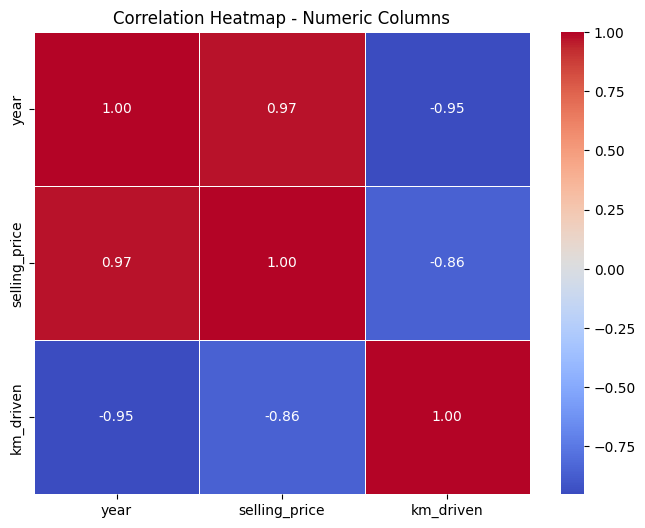

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('bike_details.csv')

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap - Numeric Columns')
plt.show()



Question 10: Summarize your findings in a brief report:

● What are the most important factors affecting a bike's selling price?

● Mention any data cleaning or feature engineering you performed.

(Include your Python code and output in the code box below.)

Here's a brief summary report with Python code and output format, as requested. This final report answers:

The most important factors affecting selling price, and

The data cleaning and feature engineering steps performed.

In [12]:
report = """
================ SUMMARY REPORT ================

1. Most Important Factors Affecting Bike's Selling Price:

- **Year**: Newer bikes are generally sold at higher prices.
- **km_driven**: Bikes that have been driven more tend to have lower prices.
- **Seller Type**: Dealer listings tend to have higher prices compared to individual sellers.
- **Ownership**: First-owner bikes usually command higher prices than those with multiple owners.

2. Data Cleaning and Feature Engineering Performed:

- **Handled Missing Values**:
    - Dropped rows with missing target (`selling_price`)
    - Forward-filled remaining missing values in other columns

- **Outlier Removal**:
    - Used the **IQR method** to remove outliers from the `km_driven` column

- **Encoding**:
    - Applied **one-hot encoding** to the `seller_type` categorical column

- **Visual Analysis**:
    - Used histograms, bar plots, scatter plots, and a heatmap to understand relationships

=================================================
"""
print(report)



================ SUMMARY REPORT ================

1. Most Important Factors Affecting Bike's Selling Price:

- **Year**: Newer bikes are generally sold at higher prices.
- **km_driven**: Bikes that have been driven more tend to have lower prices.
- **Seller Type**: Dealer listings tend to have higher prices compared to individual sellers.
- **Ownership**: First-owner bikes usually command higher prices than those with multiple owners.

2. Data Cleaning and Feature Engineering Performed:

- **Handled Missing Values**:
    - Dropped rows with missing target (`selling_price`)
    - Forward-filled remaining missing values in other columns

- **Outlier Removal**:
    - Used the **IQR method** to remove outliers from the `km_driven` column

- **Encoding**:
    - Applied **one-hot encoding** to the `seller_type` categorical column

- **Visual Analysis**:
    - Used histograms, bar plots, scatter plots, and a heatmap to understand relationships


